# Auslesen von Tabellen aus elabFTW

Diese Jupyter Notebook zeigt Ihnen, wie Sie einfach auf Inhalte in elabFTW zugreifen können. Dabei wird gezeigt, wie Sie die Daten, die in Tabellen enthalten sind, extrahieren und plotten können.

In [1]:
pip install --user elabapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Wir importieren elabpy und noch einige weitere Libraries
import pandas as pd
import numpy as np
import elabapy
import json
from requests.exceptions import HTTPError
import matplotlib.pyplot as plt

Mit der folgenden Code-Zelle greifen wir auf elabFTW zu. Hierzu müssen Sie zunächst in elabFTW einen API-key definieren. Diesen können Sie mit folgenden Schritten definieren:

1. Gehen Sie auf 'User Panel'
2. Wählen Sie den 'API Keys' Tab
3. Unter 'Create new key' definieren Sie einen beliebigen Namen für Ihren Key (z.B. 'me') und klicken dann auf 'Generate an API Key'
4. Wenn Sie 'Generate an API key' gedrückt haben, erscheint eine lange Zeichenfolge. Diese kopieren Sie in der nächsten Zelle anstelle des dort definierten keys für einen Testnutzer. 

In [3]:
# replace with your api key
my_api_key = '28633cd19875774dcba68443ef4c93f4bc6900ff8e928a9ed0648a875be9ad431ee6019d335480c7acef26'
manager = elabapy.Manager(endpoint="https://elabftw.physik.hu-berlin.de/api/v1/", token=my_api_key, verify=False)

Jetzt, wo die Verbindung zu elabFTW hergestellt wurde, können wir unseren Versuch laden. Die ExperimentID ist einfach die Nummer am Ende der URL, die unseren Versuch anzeigt. Für dieses Beispiel war die URL [https://elabftw.physik.hu-berlin.de/experiments.php?mode=view&id=209]

In [4]:
ExperimentID = 209
try:
    experiment = manager.get_experiment(ExperimentID) 
# if something goes wrong, the corresponding HTTPError will be raised
except HTTPError as e:
    print(e)

In [5]:
type(experiment)

dict

Über das Dictionaly 'experiment' kann jetzt auf den kompletten Inhalt, d.h. text, Tabellen, Bilder, etc. zugegriffen werden.  

Dieser ELN-Eintrag wurde mit dem Testversuch-Template generiert und enthält u.a. eine Tabelle, deren Werte wir im Folgenden extrahieren möchten.

In [6]:
htmlCode = experiment["body"]
# Die folgende zeile ausführen, um den HTML Code anzeigen zu lassen:
# print(htmlCode)

Im HTML Code können wir nach Tabellen suchen, die eine bestimmte Zeichenfolge enthalten. Wir suchen jeztzt nach der Tabelle, die den text "x" enthält, weil wir wissen, dass diese Tabelle in unserem Versuchbericht existiert. Die zu suchende Zeichenfolge wird dem Funktionsparameter match übergeben.

In [7]:
df = pd.read_html(htmlCode, match='x')
df[0]

0           1  2           3
0   x  y = 0.1 x2  x  y = 0.1 x2
1   0           0  0           0
2  -1         0.1  1         0.1
3  -2         0.4  2         0.4
4  -3         0.9  3         0.9
5  -4         1.6  4         1.6

Jetzt möchten wir die verschiedene Spalten extrahieren

In [8]:
dataTable = df[0].tail(-1).astype('float') # Wir skippen die erste Zeile, weil diese den Header enthält:
data = dataTable.to_numpy(dtype='float', na_value=np.nan) # Umwandeln in numpy array von Gleitkommazahlen
x = data[:,[0,2]].T.flatten()  # extrahieren der 1. und 3. Spalte
y = data[:,[1,3]].T.flatten()  # extrahieren der 2. und 4. Spalte

Jetzt können wir die Daten einfach mit Matplotlib-Befehlen darstellen:

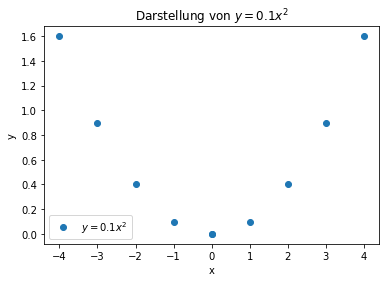

In [9]:
plt.plot(x,y,'o',label='$y = 0.1 x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Darstellung von $y = 0.1 x^2$')
plt.legend()

Die obige Abbildung kann nun mit 'Koperieren' und 'Einfügen' zurück in das ELN gebracht werden. 